<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data(y_hat)_add_delta_(4)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_4'

In [4]:
os.listdir(base_path)

['data_add_delta_4_n250.csv',
 'data_add_delta_4_n120.csv',
 'data_add_delta_4_n60.csv',
 'data_add_delta_4_n30.csv',
 'data_add_delta_4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,50.559148,81.904568,79.961837,37.315190,7725.570319,7985.311062,-418.000097,8403.311158
1,0.0,1.0,50.770029,59.077518,64.393028,64.302026,3855.014564,4103.557165,185.931746,3917.625419
2,0.0,2.0,63.581158,67.427434,32.002308,52.332133,6364.172464,6589.515497,280.890409,6308.625088
3,0.0,3.0,88.560742,20.809763,79.512827,53.166412,-311.661212,-59.611468,336.644987,-396.256455
4,0.0,4.0,60.413661,23.684278,34.086676,73.200888,610.343421,811.728925,785.684771,26.044154
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,72.686674,31.123393,65.693722,41.850934,-1012.900569,-791.545846,22.238049,-813.783895
249996,999.0,246.0,38.599956,51.098242,78.426770,85.790052,221.803962,485.718983,190.333227,295.385756
249997,999.0,247.0,93.418644,75.091147,93.791634,64.706862,-7655.657071,-7318.648784,-1428.703374,-5889.945410
249998,999.0,248.0,88.254919,37.155021,76.641003,44.885097,991.393446,1248.329486,-481.047320,1729.376807


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,50.559148,81.904568,79.961837,37.315190,7725.570319,7985.311062,-418.000097,8403.311158
1,0.0,1.0,50.770029,59.077518,64.393028,64.302026,3855.014564,4103.557165,185.931746,3917.625419
2,0.0,2.0,63.581158,67.427434,32.002308,52.332133,6364.172464,6589.515497,280.890409,6308.625088
3,0.0,3.0,88.560742,20.809763,79.512827,53.166412,-311.661212,-59.611468,336.644987,-396.256455
4,0.0,4.0,60.413661,23.684278,34.086676,73.200888,610.343421,811.728925,785.684771,26.044154
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,72.686674,31.123393,65.693722,41.850934,-1012.900569,-791.545846,22.238049,-813.783895
249996,999.0,246.0,38.599956,51.098242,78.426770,85.790052,221.803962,485.718983,190.333227,295.385756
249997,999.0,247.0,93.418644,75.091147,93.791634,64.706862,-7655.657071,-7318.648784,-1428.703374,-5889.945410
249998,999.0,248.0,88.254919,37.155021,76.641003,44.885097,991.393446,1248.329486,-481.047320,1729.376807


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    50.559148  81.904568  79.961837  37.315190  7725.570319   
      1.0    50.770029  59.077518  64.393028  64.302026  3855.014564   
      2.0    63.581158  67.427434  32.002308  52.332133  6364.172464   
      3.0    88.560742  20.809763  79.512827  53.166412  -311.661212   
      4.0    60.413661  23.684278  34.086676  73.200888   610.343421   
...                ...        ...        ...        ...          ...   
999.0 245.0  72.686674  31.123393  65.693722  41.850934 -1012.900569   
      246.0  38.599956  51.098242  78.426770  85.790052   221.803962   
      247.0  93.418644  75.091147  93.791634  64.706862 -7655.657071   
      248.0  88.254919  37.155021  76.641003  44.885097   991.393446   
      249.0  76.193548  76.536366  70.876620  48.212410 -4647.395444   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0    7985.311062  -418.000097  8403.311158  
      1.0    4103.557165   185.931746  3917.625419  
      2.0    6589.515497   280.890409  6308.625088  
      3.0     -59.611468   336.644987  -396.256455  
      4.0     811.728925   785.684771    26.044154  
...                  ...          ...          ...  
999.0 245.0  -791.545846    22.238049  -813.783895  
      246.0   485.718983   190.333227   295.385756  
      247.0 -7318.648784 -1428.703374 -5889.945410  
      248.0  1248.329486  -481.047320  1729.376807  
      249.0 -4365.576500  -919.554462 -3446.022037  

[250000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    50.559148  81.904568  79.961837  37.315190  7725.570319   
      1.0    50.770029  59.077518  64.393028  64.302026  3855.014564   
      2.0    63.581158  67.427434  32.002308  52.332133  6364.172464   
      3.0    88.560742  20.809763  79.512827  53.166412  -311.661212   
      4.0    60.413661  23.684278  34.086676  73.200888   610.343421   
...                ...        ...        ...        ...          ...   
999.0 245.0  72.686674  31.123393  65.693722  41.850934 -1012.900569   
      246.0  38.599956  51.098242  78.426770  85.790052   221.803962   
      247.0  93.418644  75.091147  93.791634  64.706862 -7655.657071   
      248.0  88.254919  37.155021  76.641003  44.885097   991.393446   
      249.0  76.193548  76.536366  70.876620  48.212410 -4647.395444   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0    7985.311062  -418.000097  8403.311158  
      1.0    4103.557165   185.931746  3917.625419  
      2.0    6589.515497   280.890409  6308.625088  
      3.0     -59.611468   336.644987  -396.256455  
      4.0     811.728925   785.684771    26.044154  
...                  ...          ...          ...  
999.0 245.0  -791.545846    22.238049  -813.783895  
      246.0   485.718983   190.333227   295.385756  
      247.0 -7318.648784 -1428.703374 -5889.945410  
      248.0  1248.329486  -481.047320  1729.376807  
      249.0 -4365.576500  -919.554462 -3446.022037  

[250000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,50.559148,81.904568,79.961837,37.315190,7725.570319,7985.311062,-418.000097,8403.311158
1,0.0,1.0,50.770029,59.077518,64.393028,64.302026,3855.014564,4103.557165,185.931746,3917.625419
2,0.0,2.0,63.581158,67.427434,32.002308,52.332133,6364.172464,6589.515497,280.890409,6308.625088
3,0.0,3.0,88.560742,20.809763,79.512827,53.166412,-311.661212,-59.611468,336.644987,-396.256455
4,0.0,4.0,60.413661,23.684278,34.086676,73.200888,610.343421,811.728925,785.684771,26.044154
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,72.686674,31.123393,65.693722,41.850934,-1012.900569,-791.545846,22.238049,-813.783895
249996,999.0,246.0,38.599956,51.098242,78.426770,85.790052,221.803962,485.718983,190.333227,295.385756
249997,999.0,247.0,93.418644,75.091147,93.791634,64.706862,-7655.657071,-7318.648784,-1428.703374,-5889.945410
249998,999.0,248.0,88.254919,37.155021,76.641003,44.885097,991.393446,1248.329486,-481.047320,1729.376807


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    50.559148  81.904568  79.961837  37.315190  7725.570319   
      1.0    50.770029  59.077518  64.393028  64.302026  3855.014564   
      2.0    63.581158  67.427434  32.002308  52.332133  6364.172464   
      3.0    88.560742  20.809763  79.512827  53.166412  -311.661212   
      4.0    60.413661  23.684278  34.086676  73.200888   610.343421   
...                ...        ...        ...        ...          ...   
999.0 245.0  72.686674  31.123393  65.693722  41.850934 -1012.900569   
      246.0  38.599956  51.098242  78.426770  85.790052   221.803962   
      247.0  93.418644  75.091147  93.791634  64.706862 -7655.657071   
      248.0  88.254919  37.155021  76.641003  44.885097   991.393446   
      249.0  76.193548  76.536366  70.876620  48.212410 -4647.395444   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0    7985.311062  -418.000097  8403.311158  
      1.0    4103.557165   185.931746  3917.625419  
      2.0    6589.515497   280.890409  6308.625088  
      3.0     -59.611468   336.644987  -396.256455  
      4.0     811.728925   785.684771    26.044154  
...                  ...          ...          ...  
999.0 245.0  -791.545846    22.238049  -813.783895  
      246.0   485.718983   190.333227   295.385756  
      247.0 -7318.648784 -1428.703374 -5889.945410  
      248.0  1248.329486  -481.047320  1729.376807  
      249.0 -4365.576500  -919.554462 -3446.022037  

[250000 rows x 8 columns]

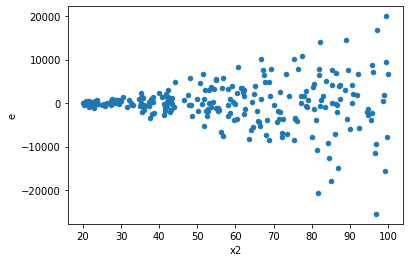

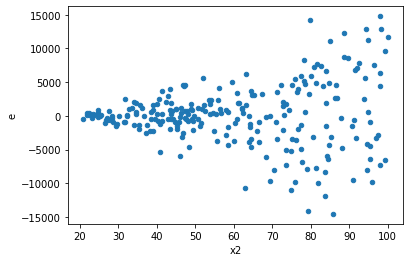

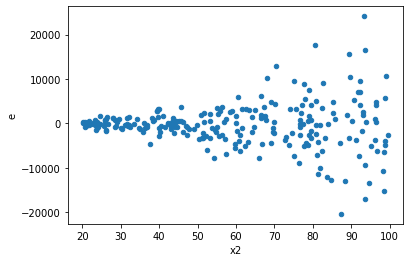

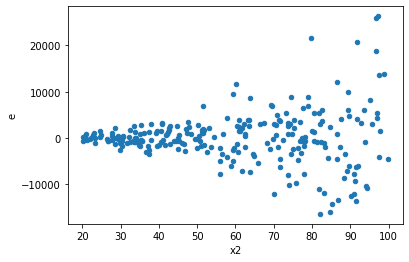

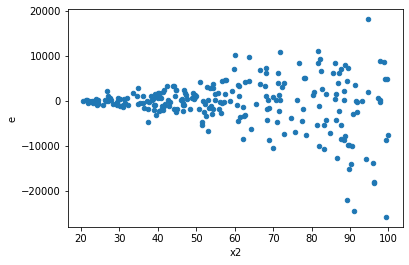

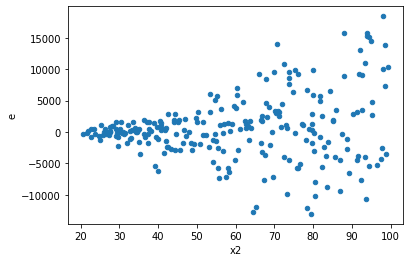

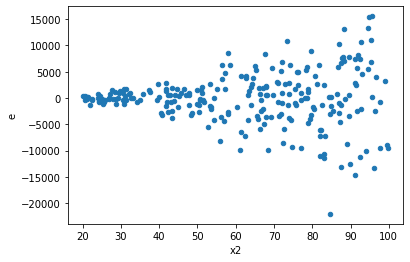

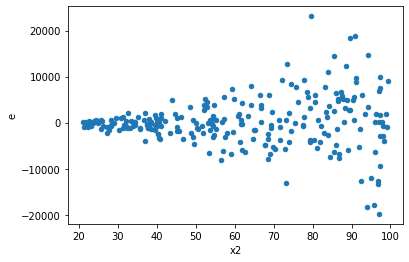

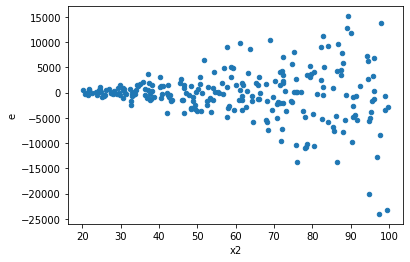

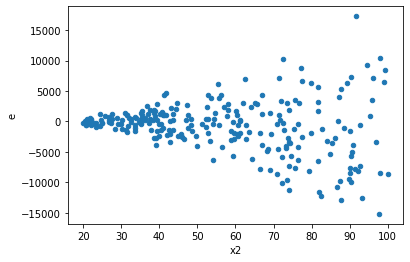

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,97.0,97.0,606518903.3039631,3691108241.1412334,6252772.199009929,38052662.27980653,6.0857266295151184,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,1219104746.2962308,4529518010.220022,12568090.16800238,46696061.961031154,3.7154461287934253,4.4916714792009316e-10,0.9999999997754164,2.2458357396004658e-10,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,480471911.8596639,3713712369.2476234,4953318.678965608,38285694.52832601,7.729301708550911,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,746006386.1709241,5175998005.606787,7690787.486298187,53360804.181513265,6.938275732697103,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
10.0,97.0,97.0,2109087225.0507028,5261372656.064754,21743167.268563945,54240955.21716241,2.4946207030096965,1.0077049852341702e-05,0.9999949614750738,5.038524926170851e-06,Reject001=0 : Heteroscedasticity
11.0,97.0,97.0,1294937680.2049787,3393839491.135262,13349872.991803905,34988035.99108517,2.620851600053867,3.389889271288027e-06,0.9999983050553644,1.6949446356440134e-06,Reject001=0 : Heteroscedasticity
12.0,97.0,97.0,642239962.0810386,3329613357.191251,6621030.536917924,34325910.89887887,5.184375862259278,1.509903313490213e-14,0.9999999999999925,7.549516567451064e-15,Reject001=0 : Heteroscedasticity
14.0,97.0,97.0,1766365195.0399704,3673856848.9610624,18209950.464329593,37874812.875887245,2.0798965351431353,0.0003736205270437054,0.9998131897364781,0.0001868102635218527,Reject001=0 : Heteroscedasticity
17.0,97.0,97.0,1360698750.1229517,4358260136.549373,14027822.166215997,44930516.871643014,3.202957404168677,2.5785917623366572e-08,0.9999999871070412,1.2892958811683286e-08,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,3505022609.922292,1504223631.474897,36134253.710539095,15507460.118297907,0.4291623190151821,4.2118708910005235e-05,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,606518903.3039631,3691108241.1412334,6252772.199009929,38052662.27980653,6.0857266295151184,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,2784764685.026258,1718921562.4729457,28708914.278621215,17720840.850236554,0.6172591787434053,0.01835188035393881,Reject001=1 : Homoscedasticity
3.0,97.0,97.0,1219104746.2962308,4529518010.220022,12568090.16800238,46696061.961031154,3.7154461287934253,4.4916714792009316e-10,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,4341364726.794906,814517900.2991223,44756337.3896382,8397091.755661055,0.1876179384956803,5.991934899606266e-15,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,480471911.8596639,3713712369.2476234,4953318.678965608,38285694.52832601,7.729301708550911,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,2913539292.706445,2240003485.242829,30036487.553674694,23092819.43549308,0.7688255623839707,0.1972557700803492,Reject001=1 : Homoscedasticity
7.0,97.0,97.0,746006386.1709241,5175998005.606787,7690787.486298187,53360804.181513265,6.938275732697103,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,4483464583.505082,610685916.0440884,46221284.36603177,6295731.093238024,0.13620848445883482,7.123921389553069e-20,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    705
Reject001=1 : Homoscedasticity      295
Name: Result_test, dtype: int64